Harjoitustyön aiheena on ennustaa kuluttajan antama arvosana Airbnb kohteelle.

Importataan ja asennetaan kirjastoja, joita voidaan hyödyntää datan käsittelyssä.

In [7]:
!pip install sklearn
!pip install numpy

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=8190085c97bec69ec16bb41b6ccbaba8c2bc06eef58984dd77024f49d6a39729
  Stored in directory: c:\users\teemu\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer as Imputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from collections import Counter

from warnings import filterwarnings
filterwarnings('ignore')

In [153]:
df = pd.read_csv("Desktop/listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20211207182400,2021-12-08,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,...,4.90,4.71,4.29,HUTB-002062,t,19,19,0,0,0.21
1,23197,https://www.airbnb.com/rooms/23197,20211207182400,2021-12-08,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,"Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,...,4.98,4.66,4.67,HUTB-005057,f,2,2,0,0,0.41
2,32711,https://www.airbnb.com/rooms/32711,20211207182400,2021-12-08,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,...,4.79,4.81,4.40,HUTB-001722,t,3,3,0,0,0.50
3,34981,https://www.airbnb.com/rooms/34981,20211207182400,2021-12-07,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,https://www.airbnb.com/users/show/73163,...,4.68,4.73,4.47,HUTB-001506,f,2,2,0,0,1.17
4,35318,https://www.airbnb.com/rooms/35318,20211207182400,2021-12-07,Luxury room with private bathroom and balcony,"Luxury Room with King Size bed, private bathro...",The Gothic Quarter of Barcelona. One of the ol...,https://a0.muscache.com/pictures/miso/Hosting-...,152070,https://www.airbnb.com/users/show/152070,...,4.83,4.81,4.68,NaN,t,1,0,1,0,1.89


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15707 entries, 0 to 15706
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15707 non-null  int64  
 1   listing_url                                   15707 non-null  object 
 2   scrape_id                                     15707 non-null  int64  
 3   last_scraped                                  15707 non-null  object 
 4   name                                          15697 non-null  object 
 5   description                                   15615 non-null  object 
 6   neighborhood_overview                         9188 non-null   object 
 7   picture_url                                   15707 non-null  object 
 8   host_id                                       15707 non-null  int64  
 9   host_url                                      15707 non-null 

In [155]:
cols_to_remove = ['id','listing_url','scrape_id','last_scraped','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_about','host_thumbnail_url',
                  'host_picture_url','host_listings_count','neighbourhood','neighbourhood_cleansed','bathrooms','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
                  'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','calendar_last_scraped','first_review','last_review','license','host_since',
                  'host_location','host_neighbourhood','host_total_listings_count','host_has_profile_pic','latitude','longitude','review_scores_accuracy','review_scores_cleanliness',
                  'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','availability_60','availability_90','host_verifications',
                  'number_of_reviews_ltm','number_of_reviews_l30d','has_availability','amenities']
data = df.drop(cols_to_remove, axis=1)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15707 entries, 0 to 15706
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            10933 non-null  object 
 1   host_response_rate            10933 non-null  object 
 2   host_acceptance_rate          11125 non-null  object 
 3   host_is_superhost             15671 non-null  object 
 4   host_identity_verified        15671 non-null  object 
 5   neighbourhood_group_cleansed  15707 non-null  object 
 6   property_type                 15707 non-null  object 
 7   room_type                     15707 non-null  object 
 8   accommodates                  15707 non-null  int64  
 9   bathrooms_text                15690 non-null  object 
 10  bedrooms                      15114 non-null  float64
 11  beds                          15010 non-null  float64
 12  price                         15707 non-null  object 
 13  m

In [157]:
cols_to_clean =['bedrooms','beds','review_scores_rating']
imputer = Imputer()
data[cols_to_clean] = imputer.fit_transform(data[cols_to_clean])
data[cols_to_clean] = data[cols_to_clean].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15707 entries, 0 to 15706
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   host_response_time            10933 non-null  object
 1   host_response_rate            10933 non-null  object
 2   host_acceptance_rate          11125 non-null  object
 3   host_is_superhost             15671 non-null  object
 4   host_identity_verified        15671 non-null  object
 5   neighbourhood_group_cleansed  15707 non-null  object
 6   property_type                 15707 non-null  object
 7   room_type                     15707 non-null  object
 8   accommodates                  15707 non-null  int64 
 9   bathrooms_text                15690 non-null  object
 10  bedrooms                      15707 non-null  int32 
 11  beds                          15707 non-null  int32 
 12  price                         15707 non-null  object
 13  minimum_nights  

In [158]:
data=data.dropna()

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10587 entries, 0 to 15706
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   host_response_time            10587 non-null  object
 1   host_response_rate            10587 non-null  object
 2   host_acceptance_rate          10587 non-null  object
 3   host_is_superhost             10587 non-null  object
 4   host_identity_verified        10587 non-null  object
 5   neighbourhood_group_cleansed  10587 non-null  object
 6   property_type                 10587 non-null  object
 7   room_type                     10587 non-null  object
 8   accommodates                  10587 non-null  int64 
 9   bathrooms_text                10587 non-null  object
 10  bedrooms                      10587 non-null  int32 
 11  beds                          10587 non-null  int32 
 12  price                         10587 non-null  object
 13  minimum_nights  

<AxesSubplot:>

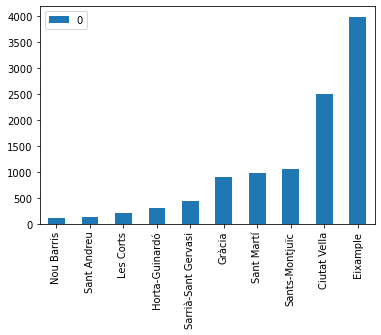

In [160]:
nb_counts = Counter(data.neighbourhood_group_cleansed)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar')

In [161]:
y = []
for i in data['instant_bookable']:
    if i == 't':
        y.append(1)
    else:
        y.append(0)
data = data.drop('instant_bookable', axis=1)
data['instant_bookable_new'] = y

x = []
for n in data['host_identity_verified']:
    if n == 't':
        x.append(1)
    else:
        x.append(0)
data = data.drop('host_identity_verified', axis=1)
data['host_identity_verified_new'] = x

z = []
for m in data['host_is_superhost']:
    if m == 't':
        z.append(1)
    else:
        z.append(0)
data = data.drop('host_is_superhost', axis=1)
data['host_is_superhost_new'] = z

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10587 entries, 0 to 15706
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   host_response_time            10587 non-null  object
 1   host_response_rate            10587 non-null  object
 2   host_acceptance_rate          10587 non-null  object
 3   neighbourhood_group_cleansed  10587 non-null  object
 4   property_type                 10587 non-null  object
 5   room_type                     10587 non-null  object
 6   accommodates                  10587 non-null  int64 
 7   bathrooms_text                10587 non-null  object
 8   bedrooms                      10587 non-null  int32 
 9   beds                          10587 non-null  int32 
 10  price                         10587 non-null  object
 11  minimum_nights                10587 non-null  int64 
 12  maximum_nights                10587 non-null  int64 
 13  availability_30 

In [163]:
categorical = ['host_response_time','neighbourhood_group_cleansed','property_type','room_type']
remove_columns = ['host_response_time','neighbourhood_group_cleansed','property_type','room_type']
category_data = pd.get_dummies(data[categorical])
data = data.drop(remove_columns, axis=1)
print(data.info())
print(category_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10587 entries, 0 to 15706
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   host_response_rate          10587 non-null  object
 1   host_acceptance_rate        10587 non-null  object
 2   accommodates                10587 non-null  int64 
 3   bathrooms_text              10587 non-null  object
 4   bedrooms                    10587 non-null  int32 
 5   beds                        10587 non-null  int32 
 6   price                       10587 non-null  object
 7   minimum_nights              10587 non-null  int64 
 8   maximum_nights              10587 non-null  int64 
 9   availability_30             10587 non-null  int64 
 10  availability_365            10587 non-null  int64 
 11  number_of_reviews           10587 non-null  int64 
 12  review_scores_rating        10587 non-null  int32 
 13  instant_bookable_new        10587 non-null  in

In [170]:
all_data = data.append(category_data, ignore_index=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21174 entries, 0 to 21173
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   host_response_rate                                 10587 non-null  object 
 1   host_acceptance_rate                               10587 non-null  object 
 2   accommodates                                       10587 non-null  float64
 3   bathrooms_text                                     10587 non-null  object 
 4   bedrooms                                           10587 non-null  float64
 5   beds                                               10587 non-null  float64
 6   price                                              10587 non-null  object 
 7   minimum_nights                                     10587 non-null  float64
 8   maximum_nights                                     10587 non-null  float64
 9   availa

In [171]:
data.head(10)

,host_response_rate,host_acceptance_rate,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable_new,host_identity_verified_new,host_is_superhost_new
0,97%,88%,8,2 baths,3,6,$102.00,1,1125,15,15,22,4,1,1,0
1,100%,83%,6,2 baths,3,4,$220.00,3,300,21,46,53,4,0,1,1
3,100%,87%,9,3 baths,4,6,$214.00,4,365,8,149,159,4,0,1,0
4,100%,100%,2,1 private bath,1,1,$93.00,3,30,14,148,242,4,1,0,0
5,100%,76%,1,1 shared bath,1,1,$36.00,2,65,6,246,85,4,0,1,1
6,99%,100%,4,1 bath,1,1,$50.00,2,364,4,310,197,4,0,1,0
7,88%,51%,6,2 baths,2,4,$110.00,3,365,18,318,39,4,0,1,0
8,100%,83%,2,1 bath,2,3,$28.00,128,340,0,133,3,4,0,1,1
10,100%,98%,6,1 bath,2,4,$105.00,2,90,7,276,54,4,1,1,0
11,100%,82%,2,2 baths,1,2,$49.00,31,730,20,355,93,4,0,1,0
